In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

def drawECDF():
    # Get input (STRG+A and STRG+C to copy all content)
    raw = input("Please Enter Site Content: ")

    # Transform raw String: Find first '1,0' and cut off anything before it
    cut_index = raw.find("1,0")
    raw = raw[cut_index:]

    # Split data 
    splitted_list = raw.split(" ")
    grades = []
    percentage = []
    grades.append(splitted_list[0].replace(",", "."))

    # Crawl Grades and Percentage, i.e. even/uneven index and replace comma with point for calculations
    for x in range(1, len(splitted_list)):
        if x % 2 == 0:
            grades.append(splitted_list[x].replace(",", "."))
        elif x % 2 != 0:
            percentage.append(splitted_list[x].replace(",", "."))

    # Add to pandas Df
    df = pd.DataFrame({"Grades": grades, "Percentage": percentage}, dtype=float)
    df["Cum. Percentage"] = df["Percentage"].cumsum()
    #print(df)
    return df

# Copy in that order for matching legends (in plot settings)
# df{1,2,3,4,5} = Informatik, WIng, InWi, Physik, Maschinenbau jeweils im Zeiraum WS2018 - SS 2020 (Name der Datei hat WS20 im Namen)
df1 = drawECDF()
df2 = drawECDF()
df3 = drawECDF()
df4 = drawECDF()
df5 = drawECDF()

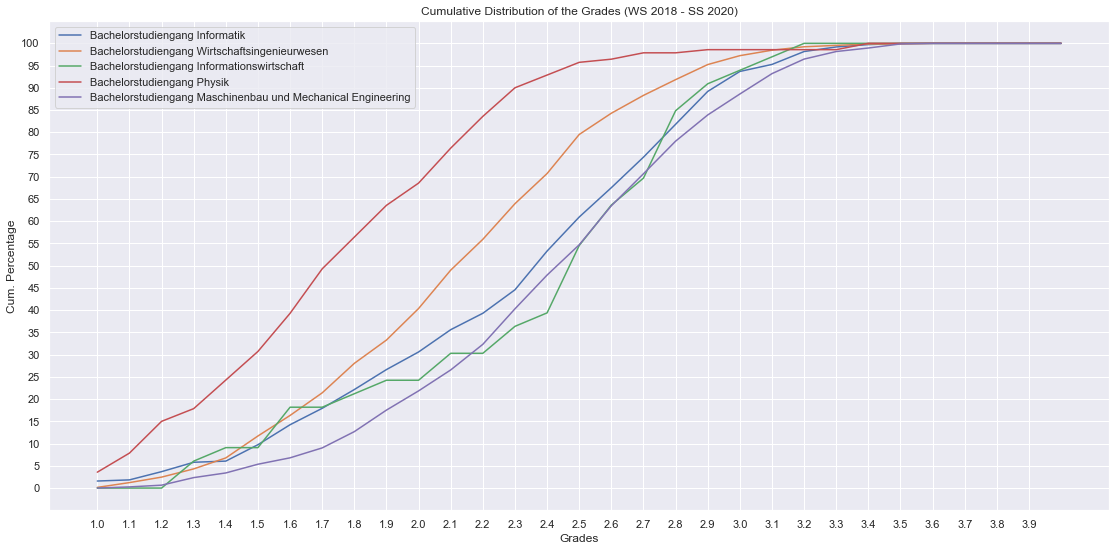

In [2]:
# Plot and Plot Settings
plt.figure(figsize=(19,9))
sns.lineplot(data=df1, x="Grades", y="Cum. Percentage")
sns.lineplot(data=df2, x="Grades", y="Cum. Percentage")
sns.lineplot(data=df3, x="Grades", y="Cum. Percentage")
sns.lineplot(data=df4, x="Grades", y="Cum. Percentage")
sns.lineplot(data=df5, x="Grades", y="Cum. Percentage")
plt.legend(["Bachelorstudiengang Informatik", "Bachelorstudiengang Wirtschaftsingenieurwesen", "Bachelorstudiengang Informationswirtschaft", "Bachelorstudiengang Physik", "Bachelorstudiengang Maschinenbau und Mechanical Engineering"])
plt.xticks(np.arange(1, 4, 0.1))
plt.yticks(np.arange(0, 105, 5))
plt.title("Cumulative Distribution of the Grades (WS 2018 - SS 2020)")

plt.savefig("ecdf_comparison_diff_majors.png", dpi=256)